In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def kmeans(k, points):
    prev_assignment = []
    #1.랜덤으로 centroid 선택
    centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
    for epoch in range(10):
      #2.랜덤으로 centroid의 cluster에 점 할당
        assignments = [assign(p, centroids, k) for p in points]
        #3. cluster의 평균을 구해서 centroid 업데이트
        centroids = compute_centroids(assignments, points, k)
        #4 cluster가 변했는지 확인하고, 변했으면 계속, 변하지 앟았으면 멈춤
        if prev_assignment == assignments:
            break
        prev_assignment = assignments
    return assignments, centroids

In [53]:
def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i] - point, centroids[i]-point))

In [54]:
def compute_centroids(assignments, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k
  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1
  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]


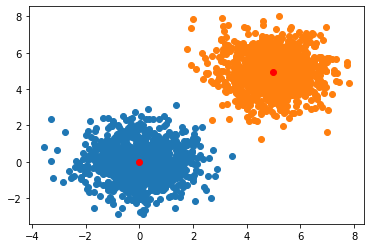

In [55]:
k = 2
points = [np.random.randn(k) for _ in range(1000)]
points.extend([np.random.randn(k) + np.array([5, 5]) for _ in range(1000)])
points = np.array(points)
# kmeans 실행
assignments, centroids = kmeans(k, points)

clusters = [[] for _ in range(k)]
for aa, p in zip(assignments, points):
  clusters[aa].append(p)

for clst in clusters:
  plt.scatter(*zip(*clst))

plt.scatter(*zip(*centroids), c='r')
plt.show()

In [56]:
def assign(p, centroids):
    min_dist_centroid_idx = -1
    min_dist = 9**9
    for i, c in enumerate(centroids):
        dist = np.sum((c-p) ** 2)
        if min_dist > dist:
              min_dist_centroid_idx = i
              min_dist = dist
    return min_dist_centroid_idx

def compute_centroids(assignments, points, k):
      clusters = [ [] for _ in range(k)]

      for a, p in zip(assignments, points):
          clusters[a].append(p) 
      return [np.mean(c, axis=0) for c in clusters]

def kmeans(k, points):
    pre_assignment = []
    #1.랜덤으로 centroid 선택
    centroids = random.choices(points,k=k)

    for epoch in range(10):
        #2.랜덤으로 centroid의 cluster에 점 할당
        assignments = [assign(p, centroids) for p in points]

        #3. cluster의 평균을 구해서 centroid 업데이트
        centroids = compute_centroids(assignments, points, k)

        #4 cluster가 변했는지 확인하고, 변했으면 계속, 변하지 앟았으면 멈춤
        if pre_assignment == assignments:
            break
        pre_assignment = assignments

    return assignments, centroids

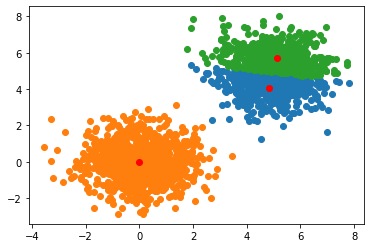

In [57]:

a, c = kmeans(3, points)

clusters = [[] for _ in range(3)]
for aa, p in zip(a, points):
  clusters[aa].append(p)

for clst in clusters:
  plt.scatter(*zip(*clst))

plt.scatter(*zip(*c), c ='red')
plt.show()
#??????????????????????????????????????????????????????????

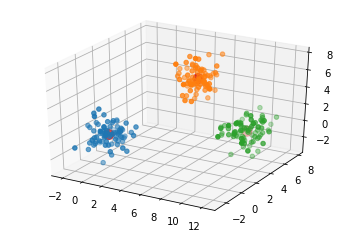

In [58]:
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(80)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(80)])
points = np.array(points)

assignments, centroids = kmeans(k, points)
fig = plt.figure()
ax = fig.gca(projection = '3d')

clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
  clusters[a].append(p)

for cluster in clusters:
  ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s =100)
plt.show()

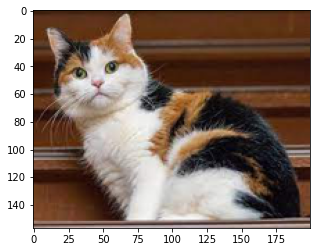

In [65]:
#이미지처리 응용
from PIL import Image

im = Image.open("aa.jpg")
width = 200
height = im.height * width // im.width
im = im.resize((width, height))
plt.imshow(im)
plt.show()

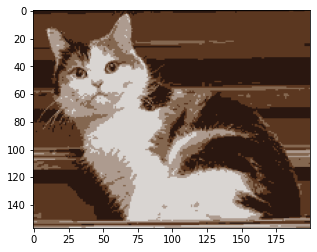

In [67]:
# k-means를 활용하여 주변과 비슷한 색을 통일함 
pixels = np.array(im).reshape(-1,3)
assignments, centroids= kmeans(5, pixels)
#모든 픽셀의 색을 centroid 중 하나로 선택
for a, i in zip(assignments, range(pixels.shape[0])):
 pixels[i] = centroids[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()